In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/distan_lat42.39707lon-8.69362p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
import pandas as pd
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_stations/marin.csv",
                      parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")

#drop duplicate index
station = station[~station.index.duplicated()]

#resample prec accumulated hour before
station["prec_1hour_b"] = station.resample("H",label="right",closed="right").sum()
station["prec_1hour_f"] = station["prec"].resample("H",label="left",closed="right").sum()

print(station.head(25))

print("\nObserved labeled variable results")
obv_r = pd.concat([station["prec_1hour_b"].value_counts().rename("Total"),
           station["prec_1hour_b"].value_counts(normalize=True).rename("Percentage").map(lambda n: '{:.1%}'.format(n))],axis=1)
obv_r.head(15)

                     prec  prec_1hour_b  prec_1hour_f
time                                                 
2021-03-11 00:10:00   0.0           NaN           NaN
2021-03-11 00:20:00   0.1           NaN           NaN
2021-03-11 00:30:00   0.0           NaN           NaN
2021-03-11 00:40:00   0.0           NaN           NaN
2021-03-11 00:50:00   0.1           NaN           NaN
2021-03-11 01:00:00   0.1           0.3           1.8
2021-03-11 01:10:00   0.2           NaN           NaN
2021-03-11 01:20:00   0.1           NaN           NaN
2021-03-11 01:30:00   0.4           NaN           NaN
2021-03-11 01:40:00   0.3           NaN           NaN
2021-03-11 01:50:00   0.4           NaN           NaN
2021-03-11 02:00:00   0.4           1.8           0.1
2021-03-11 02:10:00   0.1           NaN           NaN
2021-03-11 02:20:00   0.0           NaN           NaN
2021-03-11 02:30:00   0.0           NaN           NaN
2021-03-11 02:40:00   0.0           NaN           NaN
2021-03-11 02:50:00   0.0   

,Total,Percentage
0.0,7439,89.8%
0.1,168,2.0%
0.2,89,1.1%
0.3,63,0.8%
0.4,55,0.7%
0.5,54,0.7%
0.6,28,0.3%
0.7,26,0.3%
1.3,21,0.3%
0.8,20,0.2%


**Precipitation hour before**

In [6]:
#prec to interval
interval=pd.IntervalIndex.from_tuples([(-0.1,0.1), (0.1, 400)])
labels=['no precipitación', 'precipitación']

#drop precipitation evert 10 minutes and drop nan
station = station.drop(columns=["prec"]).dropna()

station["prec_lb"]=pd.cut(station["prec_1hour_b"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

pd.concat([station["prec_lb"].value_counts().rename("Total"),
           station["prec_lb"].value_counts(normalize=True).rename("Percentage").map(lambda n: '{:.1%}'.format(n))],axis=1)

,Total,Percentage
no precipitación,7607,91.8%
precipitación,681,8.2%


**Forecast D1**

In [ ]:
#ria forecast d1
ria_model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/lat42.39707lon-8.69362p4R4KmD1.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2021-03-12 00:00:00,232.333237,0.0,1238.289307,0.612937,1.118462,102588.828125,281.699554,0.991256,24044.080078,-0.802945,...,70.870003,-1.330203,0.000000,0.300000,0.0,0.300000,5598.117188,1522.377686,253.991684,273.149872
2021-03-12 01:00:00,260.577728,0.0,1184.147095,1.462863,2.700714,102537.101562,281.220551,0.996891,24055.048828,-1.579407,...,87.940002,-1.036703,0.000000,0.510000,0.0,0.510000,5588.875000,1519.560303,253.895309,273.118927
2021-03-12 02:00:00,283.666260,0.0,1182.647827,1.125598,2.065111,102522.640625,281.150055,0.999974,24045.392578,-1.893233,...,101.949997,-1.312238,0.000000,0.311410,0.0,0.311410,5580.415039,1516.122803,253.495071,272.793304
2021-03-12 03:00:00,296.238556,0.0,1136.875366,0.959959,6.050231,102501.906250,280.873810,1.000000,24046.484375,-1.710521,...,73.650002,-3.534316,0.000000,0.000000,0.0,0.000000,5567.827148,1511.868530,253.144577,272.663300
2021-03-12 04:00:00,308.564758,0.0,1096.920288,0.800500,1.477510,102468.609375,280.430634,0.999996,24044.431641,-1.698671,...,112.550003,-1.848379,0.000000,0.000000,0.0,0.000000,5556.495117,1507.803223,252.563675,272.336823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-20 19:00:00,276.172974,0.0,1795.061523,0.617875,2.182778,103296.898438,283.542572,0.988749,24042.578125,0.145847,...,0.000000,-0.000006,0.310000,0.084525,0.0,0.310000,5729.939941,1598.357422,257.731445,277.338318
2022-02-20 20:00:00,175.399872,0.0,1872.972412,0.436981,0.741027,103268.687500,282.965515,0.997661,24047.490234,-0.820743,...,0.000000,0.000469,0.300000,0.154020,0.0,0.300000,5734.994141,1596.083008,257.576752,278.330566
2022-02-20 21:00:00,41.960175,0.0,1785.764893,0.285660,0.560963,103320.429688,282.383575,1.000000,24044.716797,-1.623737,...,17.764999,-0.683994,0.359375,0.207169,0.0,0.359375,5739.681152,1598.200439,258.041199,277.769379


In [ ]:
#label meteorological model prec points 0 , 1, 2 and 3
ria_model4k["prec0_l"]=pd.cut(ria_model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec1_l"]=pd.cut(ria_model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec2_l"]=pd.cut(ria_model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec3_l"]=pd.cut(ria_model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()

df_all4k[["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]].sample(20)
for l in ["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.concat([df_all4k[l].value_counts().rename("Total"),
           df_all4k[l].value_counts(normalize=True).rename("Porcentaje").map(lambda n: '{:.1%}'.format(n))],axis=1))
  print("\n")

prec_lb
                  Total Porcentaje
no precipitación   7591      91.8%
precipitación       674       8.2%


prec0_l
                  Total Porcentaje
no precipitación   7151      86.5%
precipitación      1114      13.5%


prec1_l
                  Total Porcentaje
no precipitación   7036      85.1%
precipitación      1229      14.9%


prec2_l
                  Total Porcentaje
no precipitación   7048      85.3%
precipitación      1217      14.7%


prec3_l
                  Total Porcentaje
no precipitación   6924      83.8%
precipitación      1341      16.2%




In [ ]:
from sklearn.metrics import classification_report

print("Informe de calidad desagregado (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.DataFrame(classification_report(df_all4k.prec_lb, df_all4k[l],output_dict=True)).T)
  print("\n")

Informe de calidad desagregado (modelo meteorológico)

prec0_l
                  precision    recall  f1-score      support
no precipitación   0.966298  0.910288  0.937458  7591.000000
precipitación      0.388689  0.642433  0.484340   674.000000
accuracy           0.888445  0.888445  0.888445     0.888445
macro avg          0.677494  0.776361  0.710899  8265.000000
weighted avg       0.919195  0.888445  0.900506  8265.000000


prec1_l
                  precision    recall  f1-score      support
no precipitación   0.971575  0.900540  0.934710  7591.000000
precipitación      0.385679  0.703264  0.498161   674.000000
accuracy           0.884453  0.884453  0.884453     0.884453
macro avg          0.678627  0.801902  0.716435  8265.000000
weighted avg       0.923796  0.884453  0.899110  8265.000000


prec2_l
                  precision    recall  f1-score      support
no precipitación   0.969921  0.900540  0.933944  7591.000000
precipitación      0.379622  0.685460  0.488630   674.000000
ac

In [ ]:

print("Matriz de Confusión  (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  cm = pd.crosstab(df_all4k.prec_lb, df_all4k[l],margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  hss = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
  print("Heidke Skill Score:",round(hss,2))
  print("\n")


Matriz de Confusión  (modelo meteorológico)

prec0_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6910            681  7591
precipitación                  241            433   674
All                           7151           1114  8265
Heidke Skill Score: 0.43


prec1_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6836            755  7591
precipitación                  200            474   674
All                           7036           1229  8265
Heidke Skill Score: 0.44


prec2_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6836            755  7591
precipitación                  212            462   674
All                           7048           1217  8265
Heidke Skill Score: 0.43


prec3_l           no precipitación

In [ ]:
import math
from scipy.stats import entropy

for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  column_sc = pd.crosstab(df_all4k.prec_lb, df_all4k[l], margins=True,normalize="columns")
  column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
  print(column_sc)
  print("\n")




prec0_l                no precipitación  precipitación  Climatología
no precipitación               0.966298       0.611311      0.918451
precipitación                  0.033702       0.388689      0.081549
entropia/entropia.max          0.212628       0.963949      0.407613


prec1_l                no precipitación  precipitación  Climatología
no precipitación               0.971575       0.614321      0.918451
precipitación                  0.028425       0.385679      0.081549
entropia/entropia.max          0.186432       0.961955      0.407613


prec2_l                no precipitación  precipitación  Climatología
no precipitación               0.969921       0.620378      0.918451
precipitación                  0.030079       0.379622      0.081549
entropia/entropia.max          0.194790       0.957775      0.407613


prec3_l                no precipitación  precipitación  Climatología
no precipitación               0.971693       0.643550      0.918451
precipitación               

**Precipitation 1 hour forward**

In [ ]:
station["prec_lf"]=pd.cut(station["prec_1hour_f"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

pd.concat([station["prec_lf"].value_counts().rename("Total"),
           station["prec_lf"].value_counts(normalize=True).rename("Percentage").map(lambda n: '{:.1%}'.format(n))],axis=1)

,Total,Percentage
no precipitación,7608,91.8%
precipitación,680,8.2%


In [ ]:
#label meteorological model prec points 0 , 1, 2 and 3

df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()

df_all4k[["prec_lf","prec0_l","prec1_l","prec2_l","prec3_l"]].sample(20)
for l in ["prec_lf","prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.concat([df_all4k[l].value_counts().rename("Total"),
           df_all4k[l].value_counts(normalize=True).rename("Porcentaje").map(lambda n: '{:.1%}'.format(n))],axis=1))
  print("\n")

prec_lf
                  Total Porcentaje
no precipitación   7591      91.8%
precipitación       674       8.2%


prec0_l
                  Total Porcentaje
no precipitación   7151      86.5%
precipitación      1114      13.5%


prec1_l
                  Total Porcentaje
no precipitación   7036      85.1%
precipitación      1229      14.9%


prec2_l
                  Total Porcentaje
no precipitación   7048      85.3%
precipitación      1217      14.7%


prec3_l
                  Total Porcentaje
no precipitación   6924      83.8%
precipitación      1341      16.2%




In [ ]:
from sklearn.metrics import classification_report

print("Informe de calidad desagregado (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.DataFrame(classification_report(df_all4k.prec_lf, df_all4k[l],output_dict=True)).T)
  print("\n")

Informe de calidad desagregado (modelo meteorológico)

prec0_l
                  precision    recall  f1-score      support
no precipitación   0.966578  0.910552  0.937729  7591.000000
precipitación      0.390485  0.645401  0.486577   674.000000
accuracy           0.888929  0.888929  0.888929     0.888929
macro avg          0.678531  0.777976  0.712153  8265.000000
weighted avg       0.919598  0.888929  0.900938  8265.000000


prec1_l
                  precision    recall  f1-score      support
no precipitación   0.970011  0.899091  0.933206  7591.000000
precipitación      0.376729  0.686944  0.486600   674.000000
accuracy           0.881791  0.881791  0.881791     0.881791
macro avg          0.673370  0.793017  0.709903  8265.000000
weighted avg       0.921630  0.881791  0.896786  8265.000000


prec2_l
                  precision    recall  f1-score      support
no precipitación   0.968218  0.898959  0.932304  7591.000000
precipitación      0.369762  0.667656  0.475939   674.000000
ac

In [ ]:
print("Matriz de Confusión  (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  cm = pd.crosstab(df_all4k.prec_lf, df_all4k[l],margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  hss = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
  print("Heidke Skill Score:",round(hss,2))
  print("\n")


Matriz de Confusión  (modelo meteorológico)

prec0_l           no precipitación  precipitación   All
prec_lf                                                
no precipitación              6912            679  7591
precipitación                  239            435   674
All                           7151           1114  8265
Heidke Skill Score: 0.43


prec1_l           no precipitación  precipitación   All
prec_lf                                                
no precipitación              6825            766  7591
precipitación                  211            463   674
All                           7036           1229  8265
Heidke Skill Score: 0.43


prec2_l           no precipitación  precipitación   All
prec_lf                                                
no precipitación              6824            767  7591
precipitación                  224            450   674
All                           7048           1217  8265
Heidke Skill Score: 0.41


prec3_l           no precipitación

**ML algorithm**

In [ ]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = ria_model4k.columns[:-4].to_list()  

# X and Y
Y=df_all4k.prec_lb
X=df_all4k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res =SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=250).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0             no precipitación  precipitación   All
prec_lb                                                
no precipitación              1103             36  1139
precipitación                   46             55   101
All                           1149             91  1240
Heidke Skill Score: 0.54

Informe de calidad desagregado (Machine Learning)

                  precision    recall  f1-score      support
no precipitación   0.959965  0.968393  0.964161  1139.000000
precipitación      0.604396  0.544554  0.572917   101.000000
accuracy           0.933871  0.933871  0.933871     0.933871
macro avg          0.782180  0.756474  0.768539  1240.000000
weighted avg       0.931003  0.933871  0.932293  1240.000000

Matriz de Confusión  (Machine Learning)

col_0             no precipitación  precipitación   All
prec_lb                                                
no precipitación              1089             49  1138
precipitación            

,HSS
count,10.000000
mean,0.565522
std,0.047767
min,0.485505
25%,0.538248
50%,0.560754
75%,0.604712
max,0.630536


**Cross validation**

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
import sklearn

splits = 5
test_size = 0.15

cv = ShuffleSplit(n_splits= splits, test_size=test_size, random_state=100)

cros_val_dict=cross_validate(ml_model, X, Y.values.reshape(1, -1)[0], cv=cv,scoring=["accuracy",'f1_macro',"f1_weighted"]) 

cros_val=pd.DataFrame(cros_val_dict) 

print("meteorological model variables selected:\n",np.array(x_var))

print("\nCross validation:")
print ("\nSplits number:", splits, "\nTest size:",test_size)

print("\nf1_weighted: %0.2f (+/- %0.2f)" % (cros_val_dict['test_f1_weighted'].mean(), cros_val_dict['test_f1_weighted'].std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cros_val_dict['test_accuracy'].mean(), cros_val_dict['test_accuracy'].std() * 2))

print("\nAI model:",ml_model)

 
print("\nLibrary versions\n")
print('sklearn: {}'. format(sklearn. __version__))
print('pandas: {}'. format(pd. __version__))
print('numpy: {}'. format(np. __version__))

meteorological model variables selected:
 ['dir0' 'snow_prec0' 'snowlevel0' 'mod0' 'wind_gust0' 'mslp0' 'temp0'
 'rh0' 'visibility0' 'lhflx0' 'lwflx0' 'conv_prec0' 'prec0' 'swflx0'
 'shflx0' 'cape0' 'cin0' 'cfh0' 'cfl0' 'cfm0' 'cft0' 'HGT5000' 'HGT8500'
 'T5000' 'T8500' 'dir1' 'snow_prec1' 'snowlevel1' 'mod1' 'wind_gust1'
 'mslp1' 'temp1' 'rh1' 'visibility1' 'lhflx1' 'lwflx1' 'conv_prec1'
 'prec1' 'swflx1' 'shflx1' 'cape1' 'cin1' 'cfh1' 'cfl1' 'cfm1' 'cft1'
 'HGT5001' 'HGT8501' 'T5001' 'T8501' 'dir2' 'snow_prec2' 'snowlevel2'
 'mod2' 'wind_gust2' 'mslp2' 'temp2' 'rh2' 'visibility2' 'lhflx2' 'lwflx2'
 'conv_prec2' 'prec2' 'swflx2' 'shflx2' 'cape2' 'cin2' 'cfh2' 'cfl2'
 'cfm2' 'cft2' 'HGT5002' 'HGT8502' 'T5002' 'T8502' 'dir3' 'snow_prec3'
 'snowlevel3' 'mod3' 'wind_gust3' 'mslp3' 'temp3' 'rh3' 'visibility3'
 'lhflx3' 'lwflx3' 'conv_prec3' 'prec3' 'swflx3' 'shflx3' 'cape3' 'cin3'
 'cfh3' 'cfl3' 'cfm3' 'cft3' 'HGT5003' 'HGT8503' 'T5003' 'T8503']

Cross validation:

Splits number: 5 
Test s

**Export model**

In [ ]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_ENM_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])


**Forecast D0**

In [ ]:
#ria forecast d0
ria_model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/lat42.39707lon-8.69362p4R4KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2021-03-11 01:00:00,192.077499,0.0,1877.740601,4.798375,9.306268,102338.703125,285.157867,0.965328,24038.736328,3.788113,...,11.916000,-1.798941,0.578125,0.507812,0.0,0.578125,5690.290039,1520.692993,259.247253,277.836548
2021-03-11 02:00:00,198.954941,0.0,1836.123657,5.095545,10.389208,102306.968750,285.449371,0.949313,24232.718750,10.659780,...,21.313999,-0.894395,0.515625,0.671875,0.0,0.671875,5683.967773,1517.604004,259.143250,277.445221
2021-03-11 03:00:00,205.966797,0.0,1764.601929,5.489675,10.566444,102250.140625,285.591003,0.940005,24232.691406,14.975504,...,29.393999,-2.668910,0.312500,0.765625,0.0,0.765625,5672.724121,1512.249023,259.113739,277.008240
2021-03-11 04:00:00,215.598099,0.0,1729.887085,5.935259,10.595257,102268.507812,285.691986,0.940043,24234.199219,16.794680,...,34.730000,-0.046531,0.140625,0.937500,0.0,0.937500,5665.953125,1513.197998,259.174683,276.889496
2021-03-11 05:00:00,221.110214,0.0,1795.988892,5.966084,11.151688,102295.000000,285.659882,0.952087,24233.667969,13.455339,...,49.660000,-0.070668,0.187500,0.625000,0.0,0.625000,5659.806152,1512.479004,259.019379,277.758942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-19 19:00:00,311.493042,0.0,1352.959473,1.085588,1.606520,102957.070312,282.877991,0.799949,24054.039062,14.876760,...,0.000000,-0.000098,0.000000,0.369836,0.0,0.369836,5626.428223,1560.179199,252.162308,275.154572
2022-02-19 20:00:00,61.463367,0.0,1390.936646,0.113423,0.211662,102989.554688,281.907318,0.904081,24112.984375,4.993655,...,0.000000,-0.000312,0.000000,0.263371,0.0,0.263371,5636.138184,1564.495728,252.325439,275.399567
2022-02-19 21:00:00,117.234100,0.0,1380.563843,0.495187,0.947187,103036.234375,281.280823,0.915043,24066.494141,3.814798,...,0.000000,0.000090,0.000000,0.266993,0.0,0.266993,5642.563965,1568.083252,252.622192,275.141449


In [ ]:
#label meteorological model prec points 0 , 1, 2 and 3
ria_model4k["prec0_l"]=pd.cut(ria_model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec1_l"]=pd.cut(ria_model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec2_l"]=pd.cut(ria_model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec3_l"]=pd.cut(ria_model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()

df_all4k[["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]].sample(20)
for l in ["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.concat([df_all4k[l].value_counts().rename("Total"),
           df_all4k[l].value_counts(normalize=True).rename("Porcentaje").map(lambda n: '{:.1%}'.format(n))],axis=1))
  print("\n")

prec_lb
                  Total Porcentaje
no precipitación   7296      91.9%
precipitación       647       8.1%


prec0_l
                  Total Porcentaje
no precipitación   6981      87.9%
precipitación       962      12.1%


prec1_l
                  Total Porcentaje
no precipitación   6918      87.1%
precipitación      1025      12.9%


prec2_l
                  Total Porcentaje
no precipitación   6871      86.5%
precipitación      1072      13.5%


prec3_l
                  Total Porcentaje
no precipitación   6763      85.1%
precipitación      1180      14.9%




In [ ]:
from sklearn.metrics import classification_report

print("Informe de calidad desagregado (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.DataFrame(classification_report(df_all4k.prec_lb, df_all4k[l],output_dict=True)).T)
  print("\n")

Informe de calidad desagregado (modelo meteorológico)

prec0_l
                  precision    recall  f1-score      support
no precipitación   0.968056  0.926261  0.946697  7296.000000
precipitación      0.440748  0.655332  0.527035   647.000000
accuracy           0.904192  0.904192  0.904192     0.904192
macro avg          0.704402  0.790797  0.736866  7943.000000
weighted avg       0.925104  0.904192  0.912514  7943.000000


prec1_l
                  precision    recall  f1-score      support
no precipitación   0.971090  0.920779  0.945265  7296.000000
precipitación      0.436098  0.690881  0.534689   647.000000
accuracy           0.902052  0.902052  0.902052     0.902052
macro avg          0.703594  0.805830  0.739977  7943.000000
weighted avg       0.927512  0.902052  0.911822  7943.000000


prec2_l
                  precision    recall  f1-score      support
no precipitación   0.971038  0.914474  0.941907  7296.000000
precipitación      0.417910  0.692427  0.521233   647.000000
ac

In [ ]:
print("Matriz de Confusión  (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  cm = pd.crosstab(df_all4k.prec_lb, df_all4k[l],margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  hss = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
  print("Heidke Skill Score:",round(hss,2))
  print("\n")


Matriz de Confusión  (modelo meteorológico)

prec0_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6758            538  7296
precipitación                  223            424   647
All                           6981            962  7943
Heidke Skill Score: 0.48


prec1_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6718            578  7296
precipitación                  200            447   647
All                           6918           1025  7943
Heidke Skill Score: 0.48


prec2_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6672            624  7296
precipitación                  199            448   647
All                           6871           1072  7943
Heidke Skill Score: 0.47


prec3_l           no precipitación

In [ ]:
import math
from scipy.stats import entropy

for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  column_sc = pd.crosstab(df_all4k.prec_lb, df_all4k[l], margins=True,normalize="columns")
  column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
  print(column_sc)
  print("\n")


prec0_l                no precipitación  precipitación  Climatología
no precipitación               0.968056       0.559252      0.918545
precipitación                  0.031944       0.440748      0.081455
entropia/entropia.max          0.204048       0.989846      0.407287


prec1_l                no precipitación  precipitación  Climatología
no precipitación               0.971090       0.563902      0.918545
precipitación                  0.028910       0.436098      0.081455
entropia/entropia.max          0.188896       0.988185      0.407287


prec2_l                no precipitación  precipitación  Climatología
no precipitación               0.971038       0.582090      0.918545
precipitación                  0.028962       0.417910      0.081455
entropia/entropia.max          0.189161       0.980468      0.407287


prec3_l                no precipitación  precipitación  Climatología
no precipitación               0.973237       0.605085      0.918545
precipitación               

**ML algorithm**

In [ ]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = ria_model4k.columns[:-4].to_list()  

# X and Y
Y=df_all4k.prec_lb
X=df_all4k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res =SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nEstadísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()



Matriz de Confusión  (Machine Learning)

col_0             no precipitación  precipitación   All
prec_lb                                                
no precipitación              1048             58  1106
precipitación                   30             56    86
All                           1078            114  1192
Heidke Skill Score: 0.52

Informe de calidad desagregado (Machine Learning)

                  precision    recall  f1-score      support
no precipitación   0.972171  0.947559  0.959707  1106.000000
precipitación      0.491228  0.651163  0.560000    86.000000
accuracy           0.926174  0.926174  0.926174     0.926174
macro avg          0.731699  0.799361  0.759853  1192.000000
weighted avg       0.937472  0.926174  0.930869  1192.000000

Matriz de Confusión  (Machine Learning)

col_0             no precipitación  precipitación   All
prec_lb                                                
no precipitación              1057             47  1104
precipitación            

,HSS
count,10.000000
mean,0.560980
std,0.043937
min,0.496810
25%,0.532498
50%,0.546960
75%,0.597065
max,0.636533


**Cross validation**

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
import sklearn

splits = 5
test_size = 0.15

cv = ShuffleSplit(n_splits= splits, test_size=test_size, random_state=100)

cros_val_dict=cross_validate(ml_model, X, Y.values.reshape(1, -1)[0], cv=cv,scoring=["accuracy",'f1_macro',"f1_weighted"]) 

cros_val=pd.DataFrame(cros_val_dict) 

print("meteorological model variables selected:\n",np.array(x_var))

print("\nCross validation:")
print ("\nSplits number:", splits, "\nTest size:",test_size)

print("\nf1_weighted: %0.2f (+/- %0.2f)" % (cros_val_dict['test_f1_weighted'].mean(), cros_val_dict['test_f1_weighted'].std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cros_val_dict['test_accuracy'].mean(), cros_val_dict['test_accuracy'].std() * 2))

print("\nAI model:",ml_model)

 
print("\nLibrary versions\n")
print('sklearn: {}'. format(sklearn. __version__))
print('pandas: {}'. format(pd. __version__))
print('numpy: {}'. format(np. __version__))

meteorological model variables selected:
 ['dir0' 'snow_prec0' 'snowlevel0' 'mod0' 'wind_gust0' 'mslp0' 'temp0'
 'rh0' 'visibility0' 'lhflx0' 'lwflx0' 'conv_prec0' 'prec0' 'swflx0'
 'shflx0' 'cape0' 'cin0' 'cfh0' 'cfl0' 'cfm0' 'cft0' 'HGT5000' 'HGT8500'
 'T5000' 'T8500' 'dir1' 'snow_prec1' 'snowlevel1' 'mod1' 'wind_gust1'
 'mslp1' 'temp1' 'rh1' 'visibility1' 'lhflx1' 'lwflx1' 'conv_prec1'
 'prec1' 'swflx1' 'shflx1' 'cape1' 'cin1' 'cfh1' 'cfl1' 'cfm1' 'cft1'
 'HGT5001' 'HGT8501' 'T5001' 'T8501' 'dir2' 'snow_prec2' 'snowlevel2'
 'mod2' 'wind_gust2' 'mslp2' 'temp2' 'rh2' 'visibility2' 'lhflx2' 'lwflx2'
 'conv_prec2' 'prec2' 'swflx2' 'shflx2' 'cape2' 'cin2' 'cfh2' 'cfl2'
 'cfm2' 'cft2' 'HGT5002' 'HGT8502' 'T5002' 'T8502' 'dir3' 'snow_prec3'
 'snowlevel3' 'mod3' 'wind_gust3' 'mslp3' 'temp3' 'rh3' 'visibility3'
 'lhflx3' 'lwflx3' 'conv_prec3' 'prec3' 'swflx3' 'shflx3' 'cape3' 'cin3'
 'cfh3' 'cfl3' 'cfm3' 'cft3' 'HGT5003' 'HGT8503' 'T5003' 'T8503']

Cross validation:

Splits number: 5 
Test s

**Export model**

In [ ]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_ENM_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


**forecast d2**

In [ ]:
#ria forecast d2
ria_model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/lat42.39707lon-8.69362p4R4KmD2.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2021-03-13 00:00:00,214.545364,0.0,1166.868286,3.140418,4.824757,102560.140625,281.254181,0.952518,24049.062500,0.164406,...,51.520000,-1.374254,0.0,0.194357,0.0,0.194357,5580.275879,1518.526978,250.875244,273.314484
2021-03-13 01:00:00,225.678787,0.0,1128.045166,4.475591,6.153662,102533.843750,281.739441,0.926475,24042.150391,5.010872,...,55.029999,-2.741293,0.0,0.533955,0.0,0.533955,5574.872070,1515.244019,251.213806,272.804291
2021-03-13 02:00:00,239.999359,0.0,1116.512085,5.076742,7.992311,102479.242188,281.989441,0.935685,16835.328125,5.006819,...,67.059998,-2.830637,0.0,0.600000,0.0,0.600000,5568.991211,1513.017944,251.418686,272.579834
2021-03-13 03:00:00,239.184814,0.0,1117.297363,5.250713,8.446166,102396.609375,282.385498,0.914196,24234.072266,13.602778,...,65.680000,-2.403894,0.0,0.152376,0.0,0.152376,5560.987793,1504.526001,251.836380,272.713043
2021-03-13 04:00:00,246.586426,0.0,1163.626709,5.125148,8.151620,102331.562500,282.544067,0.917266,24038.500000,14.297740,...,58.830002,-1.887336,0.0,0.454938,0.0,0.454938,5555.812012,1499.142944,252.413376,272.892181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-21 19:00:00,355.647461,0.0,2032.414062,1.049479,3.642752,103183.070312,284.074738,0.992159,24043.919922,-0.246143,...,0.000000,0.000488,0.0,0.000000,0.0,0.000000,5754.759766,1597.805542,258.269867,280.105377
2022-02-21 20:00:00,14.205400,0.0,2068.030029,1.789081,5.230898,103210.468750,283.419312,0.990247,24043.736328,-0.776044,...,0.000000,-0.000238,0.0,0.000000,0.0,0.000000,5761.044922,1600.918213,258.776062,280.371124
2022-02-21 21:00:00,29.933767,0.0,2066.399414,1.791273,3.336884,103265.210938,282.753876,0.977224,24035.980469,0.002071,...,0.000000,0.000262,0.0,0.000000,0.0,0.000000,5766.887207,1605.219849,258.889862,280.220367


In [ ]:
#label meteorological model prec points 0 , 1, 2 and 3
ria_model4k["prec0_l"]=pd.cut(ria_model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec1_l"]=pd.cut(ria_model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec2_l"]=pd.cut(ria_model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec3_l"]=pd.cut(ria_model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()

df_all4k[["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]].sample(20)
for l in ["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.concat([df_all4k[l].value_counts().rename("Total"),
           df_all4k[l].value_counts(normalize=True).rename("Porcentaje").map(lambda n: '{:.1%}'.format(n))],axis=1))
  print("\n")

prec_lb
                  Total Porcentaje
no precipitación   7569      91.8%
precipitación       672       8.2%


prec0_l
                  Total Porcentaje
no precipitación   7111      86.3%
precipitación      1130      13.7%


prec1_l
                  Total Porcentaje
no precipitación   7014      85.1%
precipitación      1227      14.9%


prec2_l
                  Total Porcentaje
no precipitación   7014      85.1%
precipitación      1227      14.9%


prec3_l
                  Total Porcentaje
no precipitación   6907      83.8%
precipitación      1334      16.2%




In [ ]:
from sklearn.metrics import classification_report

print("Informe de calidad desagregado (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.DataFrame(classification_report(df_all4k.prec_lb, df_all4k[l],output_dict=True)).T)
  print("\n")

Informe de calidad desagregado (modelo meteorológico)

prec0_l
                  precision    recall  f1-score      support
no precipitación   0.962453  0.904215  0.932425  7569.000000
precipitación      0.358407  0.602679  0.449501   672.000000
accuracy           0.879626  0.879626  0.879626     0.879626
macro avg          0.660430  0.753447  0.690963  8241.000000
weighted avg       0.913197  0.879626  0.893046  8241.000000


prec1_l
                  precision    recall  f1-score      support
no precipitación   0.965783  0.894966  0.929027  7569.000000
precipitación      0.352078  0.642857  0.454976   672.000000
accuracy           0.874408  0.874408  0.874408     0.874408
macro avg          0.658930  0.768912  0.692002  8241.000000
weighted avg       0.915739  0.874408  0.890371  8241.000000


prec2_l
                  precision    recall  f1-score      support
no precipitación   0.964927  0.894174  0.928204  7569.000000
precipitación      0.347188  0.633929  0.448657   672.000000
ac

In [ ]:
print("Matriz de Confusión  (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  cm = pd.crosstab(df_all4k.prec_lb, df_all4k[l],margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  hss = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
  print("Heidke Skill Score:",round(hss,2))
  print("\n")

Matriz de Confusión  (modelo meteorológico)

prec0_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6844            725  7569
precipitación                  267            405   672
All                           7111           1130  8241
Heidke Skill Score: 0.39


prec1_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6774            795  7569
precipitación                  240            432   672
All                           7014           1227  8241
Heidke Skill Score: 0.39


prec2_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6768            801  7569
precipitación                  246            426   672
All                           7014           1227  8241
Heidke Skill Score: 0.38


prec3_l           no precipitación

**ml d2**

In [ ]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = ria_model4k.columns[:-4].to_list()  

# X and Y
Y=df_all4k.prec_lb
X=df_all4k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res =SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nEstadísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0             no precipitación  precipitación   All
prec_lb                                                
no precipitación              1096             53  1149
precipitación                   37             51    88
All                           1133            104  1237
Heidke Skill Score: 0.49

Informe de calidad desagregado (Machine Learning)

                  precision    recall  f1-score      support
no precipitación   0.967343  0.953873  0.960561  1149.000000
precipitación      0.490385  0.579545  0.531250    88.000000
accuracy           0.927243  0.927243  0.927243     0.927243
macro avg          0.728864  0.766709  0.745905  1237.000000
weighted avg       0.933413  0.927243  0.930020  1237.000000

Matriz de Confusión  (Machine Learning)

col_0             no precipitación  precipitación   All
prec_lb                                                
no precipitación              1080             50  1130
precipitación            

,HSS
count,10.000000
mean,0.519198
std,0.035855
min,0.466344
25%,0.492958
50%,0.512588
75%,0.546146
max,0.580308


**Export algorithm d2**

In [ ]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_ENM_d2.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


**Forecast D3**


In [4]:
#ria forecast d2
ria_model4k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/lat42.39707lon-8.69362p4R4KmD3.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2021-03-14 00:00:00,74.584923,0.0,1183.465576,0.793391,1.421949,102849.468750,280.098236,0.963924,24036.228516,0.649789,...,0.00,-2.148437e-04,0.0,0.0,0.0,0.0,5630.666992,1539.315186,253.140121,273.166931
2021-03-14 01:00:00,84.748848,0.0,1160.389038,0.461517,0.857562,102874.226562,279.712799,0.959890,24035.634766,0.583928,...,1.22,-9.590371e+00,0.0,0.0,0.0,0.0,5635.463867,1541.655640,253.169373,272.745514
2021-03-14 02:00:00,52.935852,0.0,1191.206421,0.710707,1.335800,102909.632812,279.351685,0.961595,24036.759766,0.554158,...,1.82,-9.609727e+00,0.0,0.0,0.0,0.0,5639.230957,1544.608765,253.186874,272.781281
2021-03-14 03:00:00,26.017145,0.0,1215.858398,1.443988,2.651923,102878.414062,278.975189,0.962958,24035.437500,0.544643,...,0.00,1.171875e-04,0.0,0.0,0.0,0.0,5637.603027,1541.835693,253.211624,272.776520
2021-03-14 04:00:00,15.195013,0.0,1326.112915,1.921604,3.414619,102851.664062,278.696808,0.962030,24036.068359,0.600240,...,0.00,2.343750e-05,0.0,0.0,0.0,0.0,5635.388184,1540.555908,253.168930,273.664917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-22 19:00:00,16.908543,0.0,2019.720459,0.134886,0.263963,102863.773438,284.278870,0.852617,24112.751953,8.009602,...,0.00,-3.750000e-06,0.0,0.0,0.0,0.0,5736.203125,1578.076904,258.595490,279.964447
2022-02-22 20:00:00,90.490051,0.0,2076.148926,0.915705,1.704432,102833.070312,283.688751,0.858072,24077.722656,6.455227,...,0.00,-6.250000e-07,0.0,0.0,0.0,0.0,5733.734375,1578.286743,258.333008,280.661255
2022-02-22 21:00:00,49.215038,0.0,2079.569580,0.665074,1.239898,102826.070312,283.177307,0.870255,24068.048828,5.196089,...,0.00,-6.250000e-07,0.0,0.0,0.0,0.0,5731.478516,1579.103760,258.078125,280.565002


In [7]:
#label meteorological model prec points 0 , 1, 2 and 3
ria_model4k["prec0_l"]=pd.cut(ria_model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec1_l"]=pd.cut(ria_model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec2_l"]=pd.cut(ria_model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec3_l"]=pd.cut(ria_model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()

df_all4k[["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]].sample(20)
for l in ["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.concat([df_all4k[l].value_counts().rename("Total"),
           df_all4k[l].value_counts(normalize=True).rename("Porcentaje").map(lambda n: '{:.1%}'.format(n))],axis=1))
  print("\n")

prec_lb
                  Total Porcentaje
no precipitación   7548      91.9%
precipitación       669       8.1%


prec0_l
                  Total Porcentaje
no precipitación   7088      86.3%
precipitación      1129      13.7%


prec1_l
                  Total Porcentaje
no precipitación   6985      85.0%
precipitación      1232      15.0%


prec2_l
                  Total Porcentaje
no precipitación   6945      84.5%
precipitación      1272      15.5%


prec3_l
                  Total Porcentaje
no precipitación   6858      83.5%
precipitación      1359      16.5%




In [8]:
from sklearn.metrics import classification_report

print("Informe de calidad desagregado (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.DataFrame(classification_report(df_all4k.prec_lb, df_all4k[l],output_dict=True)).T)
  print("\n")

Informe de calidad desagregado (modelo meteorológico)

prec0_l
                  precision    recall  f1-score      support
no precipitación   0.956123  0.897854  0.926073  7548.000000
precipitación      0.317095  0.535127  0.398220   669.000000
accuracy           0.868322  0.868322  0.868322     0.868322
macro avg          0.636609  0.716490  0.662146  8217.000000
weighted avg       0.904096  0.868322  0.883097  8217.000000


prec1_l
                  precision    recall  f1-score      support
no precipitación   0.958912  0.887387  0.921764  7548.000000
precipitación      0.310065  0.571001  0.401894   669.000000
accuracy           0.861628  0.861628  0.861628     0.861628
macro avg          0.634488  0.729194  0.661829  8217.000000
weighted avg       0.906085  0.861628  0.879438  8217.000000


prec2_l
                  precision    recall  f1-score      support
no precipitación   0.961987  0.885135  0.921962  7548.000000
precipitación      0.318396  0.605381  0.417311   669.000000
ac

In [9]:
print("Matriz de Confusión  (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  cm = pd.crosstab(df_all4k.prec_lb, df_all4k[l],margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  hss = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
  print("Heidke Skill Score:",round(hss,2))
  print("\n")

Matriz de Confusión  (modelo meteorológico)

prec0_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6777            771  7548
precipitación                  311            358   669
All                           7088           1129  8217
Heidke Skill Score: 0.33


prec1_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6698            850  7548
precipitación                  287            382   669
All                           6985           1232  8217
Heidke Skill Score: 0.33


prec2_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6681            867  7548
precipitación                  264            405   669
All                           6945           1272  8217
Heidke Skill Score: 0.35


prec3_l           no precipitación

In [10]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = ria_model4k.columns[:-4].to_list()  

# X and Y
Y=df_all4k.prec_lb
X=df_all4k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res =SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nEstadísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0             no precipitación  precipitación   All
prec_lb                                                
no precipitación              1055             58  1113
precipitación                   49             71   120
All                           1104            129  1233
Heidke Skill Score: 0.52

Informe de calidad desagregado (Machine Learning)

                  precision    recall  f1-score     support
no precipitación   0.955616  0.947889  0.951737  1113.00000
precipitación      0.550388  0.591667  0.570281   120.00000
accuracy           0.913220  0.913220  0.913220     0.91322
macro avg          0.753002  0.769778  0.761009  1233.00000
weighted avg       0.916178  0.913220  0.914612  1233.00000

Matriz de Confusión  (Machine Learning)

col_0             no precipitación  precipitación   All
prec_lb                                                
no precipitación              1072             50  1122
precipitación                  

,HSS
count,10.000000
mean,0.463707
std,0.045900
min,0.380910
25%,0.437783
50%,0.473655
75%,0.495846
max,0.522088


**Export algorithm d3**

In [12]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_ENM_d3.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


**Pycaret issues**

In [ ]:
!pip install pycaret

In [ ]:
!pip install Jinja2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Jinja2

In [ ]:
from pycaret.classification import *
clas = setup(df_all4k.drop(columns=["prec0_l","prec1_l","prec2_l","prec3_l"]),target = 'prec_l',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=False,
             fix_imbalance=False,ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.15,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)

In [ ]:
compare_models(fold=5,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9364,0.9353,0.4163,0.6728,0.5137,0.4816,0.4979,0.404
lda,Linear Discriminant Analysis,0.9256,0.9074,0.4409,0.5485,0.4885,0.4489,0.4522,0.042
rf,Random Forest Classifier,0.9370,0.9315,0.3652,0.7152,0.4821,0.4524,0.4822,1.374
et,Extra Trees Classifier,0.9365,0.9354,0.3545,0.7164,0.4739,0.4443,0.4758,0.770
nb,Naive Bayes,0.8756,0.8879,0.6402,0.3520,0.4538,0.3904,0.4129,0.024
gbc,Gradient Boosting Classifier,0.9304,0.9237,0.3580,0.6237,0.4537,0.4194,0.4386,2.358
qda,Quadratic Discriminant Analysis,0.8973,0.8927,0.5168,0.3956,0.4480,0.3925,0.3968,0.028
dt,Decision Tree Classifier,0.9092,0.7021,0.4552,0.4387,0.4461,0.3968,0.3972,0.106
ada,Ada Boost Classifier,0.9230,0.9119,0.3632,0.5386,0.4319,0.3924,0.4022,0.592
knn,K Neighbors Classifier,0.9273,0.8529,0.3175,0.5934,0.4124,0.3776,0.3992,0.178


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=20, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
model=create_model("lightgbm",n_estimators=250,fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9346,0.9350,0.3333,0.7037,0.4524,0.4223,0.4559
1,0.9360,0.9278,0.4737,0.6429,0.5455,0.5119,0.5188
2,0.9474,0.9481,0.4912,0.7778,0.6022,0.5755,0.5930
3,0.9317,0.9299,0.3684,0.6364,0.4667,0.4330,0.4515
4,0.9417,0.9498,0.3684,0.8077,0.5060,0.4796,0.5217
5,0.9531,0.9426,0.5614,0.8000,0.6598,0.6354,0.6469
6,0.9246,0.9310,0.4035,0.5476,0.4646,0.4251,0.4308
7,0.9373,0.9457,0.3393,0.7308,0.4634,0.4348,0.4712
8,0.9416,0.9436,0.5179,0.6744,0.5859,0.5550,0.5606
9,0.9316,0.9383,0.3393,0.6333,0.4419,0.4090,0.4317


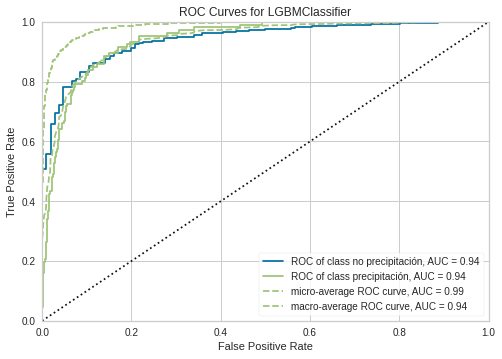

In [ ]:
plot_model(model, plot = 'auc')

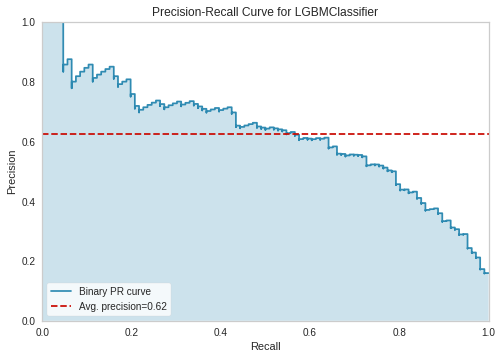

In [ ]:
plot_model(model, plot = 'pr')

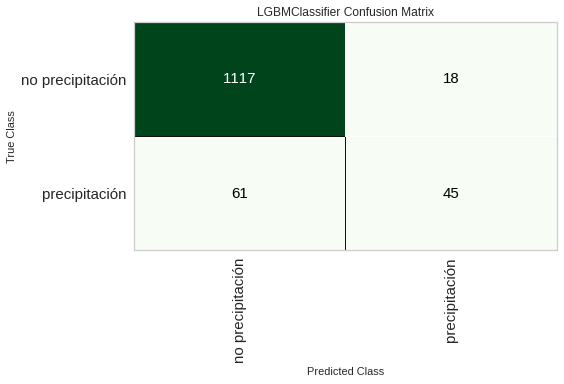

In [ ]:
plot_model(model,'confusion_matrix')

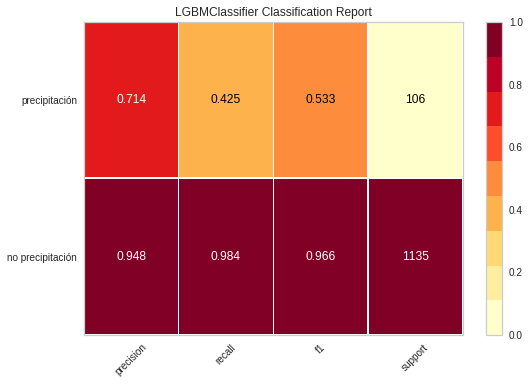

In [ ]:
plot_model(model,'class_report')

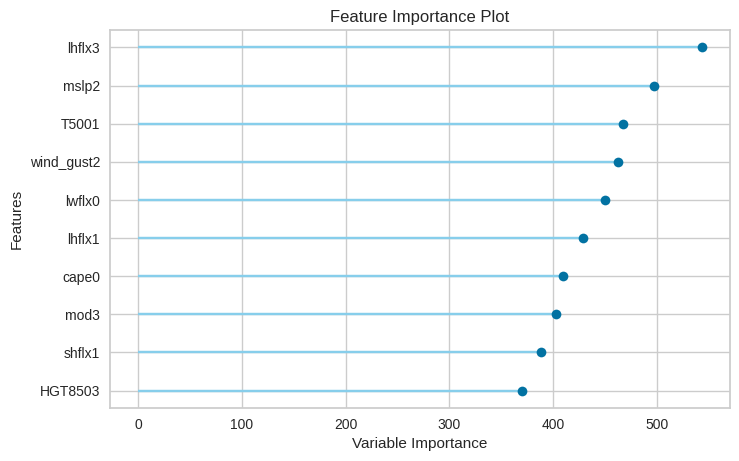

In [ ]:
plot_model(model,"feature")

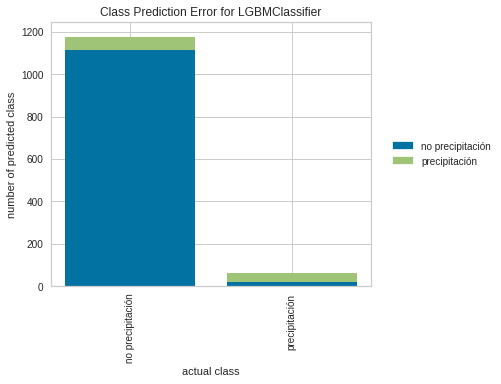

In [ ]:
plot_model(model,"error")